# Census Income Project
#### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

##### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Uploading Dataset

In [2]:
census = pd.read_csv("census.csv")
# Reading first 6 rows
census.head(6)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [3]:
# let's check the dimension/shape/structure of our dataset.
print("Rows : Columns "+str(census.shape))

Rows : Columns (32560, 15)


In [4]:
# Checking columns
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# check  column types

ctype = census.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,6
1,object,9


In [6]:
# Checking full information of our dataset.
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Let's check the null values
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

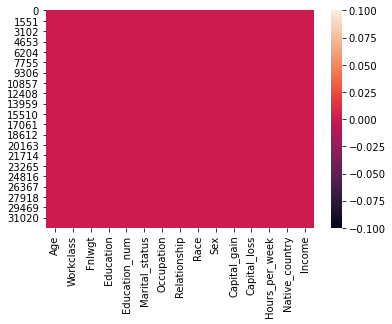

In [8]:
# Checking null values using graph
sns.heatmap(census.isnull())

##### No null values in our dataset.

In [9]:
# Now checking  features description.
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Key Observations :-
1. `Age` have difference in mean and median and also 100th percentile also show presence of outliers in feature.
2. `Capital_gain` and `Captila_loss` are not having normally distributed data and also high standard deviation is present means data is widely spreaded.

In [10]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Numerical features pre-processing

In [11]:
num =[]
for i in census.columns:
    if census[i].dtypes!="object":
        num.append(i)

print(list(num))
        

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


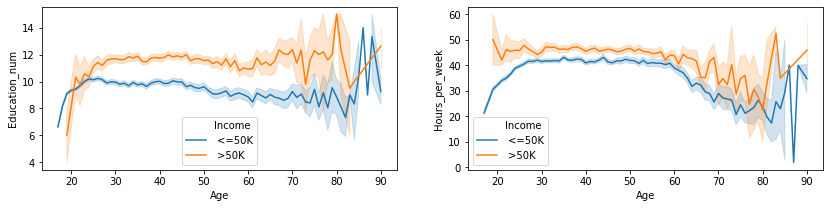

In [12]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.lineplot(x='Age', y='Education_num',hue='Income',data=census)
plt.subplot(1,2,2)
sns.lineplot(x='Age', y='Hours_per_week',hue='Income',data=census)


##### As in graph ,old age people have higher level of education  and  young age people are working for more hours which is also relateble  but there is some outliers as old age people cannot work so much ,the graph should go done insted of rising agian.
##### Those who are having higher education qualification and working for more hours are earnings more than 50k.

In [13]:
data_error=census[(census['Age']>85) & (census['Hours_per_week']>40)]
data_error.loc[:,["Age","Hours_per_week"]]

,Age,Hours_per_week
1934,90,45
5369,90,60
5405,90,50
6231,90,50
8805,90,72
10544,90,50
11995,90,55
15355,90,99


This seems to be some unrealistic data because in age 90 people cannot do soo much work.

In [14]:
data=list(data_error.index)
census.drop(axis='index',index=data,inplace=True)
print("After removing hours related outliers",census.shape)

After removing hours related outliers (32552, 15)


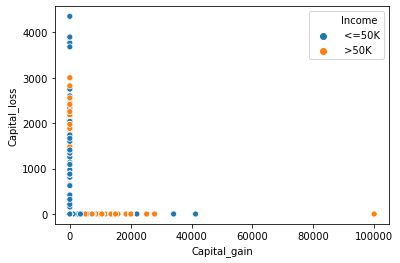

In [15]:
sns.scatterplot(x='Capital_gain' ,y='Capital_loss',hue='Income',data=census)

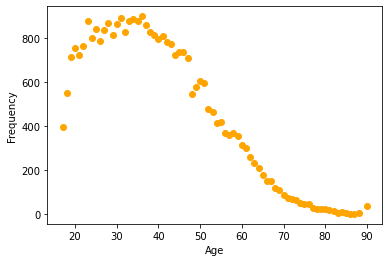

In [16]:
a=census['Age'].value_counts().reset_index()
plt.scatter(x='index',y='Age',data=a,color='orange')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

##### High frequency of Age between 22-40 years of age is present ,while least frequency is of old age people in dataset.

In [17]:
for i in census.columns:
    if census[i].dtypes=="object":
        print(f"Distinct values fro {i} are -\n{census[i].value_counts()}")
        print("\n")

Distinct values fro Workclass are -
 Private             22690
 Self-emp-not-inc     2540
 Local-gov            2092
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Distinct values fro Education are -
 HS-grad         10499
 Some-college     7291
 Bachelors        5351
 Masters          1721
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       575
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Distinct values fro Marital_status are -
 Married-civ-spouse       14971
 Never-married            10680
 Divorced                  4443
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      418
 Married-AF-spouse  

In [18]:
#Replacing the question mark with NaN
df=census.replace('?',np.nan,inplace=True)


In [19]:

for col in ['Workclass','Occupation','Native_country']:
    census[col].fillna(census[col].mode()[0],inplace=True)

In [20]:
census['Workclass'].value_counts()

 Private             22690
 Self-emp-not-inc     2540
 Local-gov            2092
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Percentage of above 50k - 75.92%
Percentage of below 50k - 24.08%


Percentage of Male values 66.91%
Percentage of Female values 33.09%


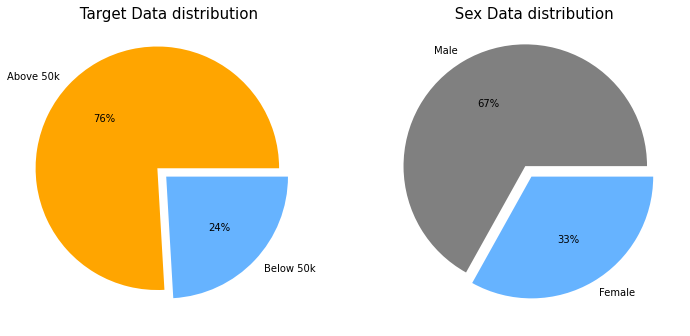

In [21]:
Above_50k=census['Income'].value_counts()[0]
Below_50k=census['Income'].value_counts()[1]
total = census['Income'].value_counts()[0] + census['Income'].value_counts()[1]
print("Percentage of above 50k - "+str(round((Above_50k/total)*100,2))+"%")
print("Percentage of below 50k - "+str(round((Below_50k/total)*100,2))+"%")
print("\n")
Male =census['Sex'].value_counts()[0]
Female =census['Sex'].value_counts()[1]
total=census['Sex'].value_counts()[0] + census['Sex'].value_counts()[1]
print("Percentage of Male values "+str(round((Male/total)*100,2))+"%")
print("Percentage of Female values "+str(round((Female/total)*100,2))+"%")

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie([Above_50k,Below_50k], labels=['Above 50k', 'Below 50k'], autopct='%1.0f%%', colors = ['orange','#66b3ff'],explode=(0.1,0))
plt.title(" Target Data distribution",fontsize=15)

plt.subplot(1,2,2)
plt.pie([Male,Female], labels=['Male', 'Female'], autopct='%1.0f%%', colors = ['grey','#66b3ff'],explode=(0.1,0))
plt.title(" Sex Data distribution",fontsize=15)

plt.show()


In target data there is more of people whose income is above 50k while percentage of males is also greater than percentage of females.

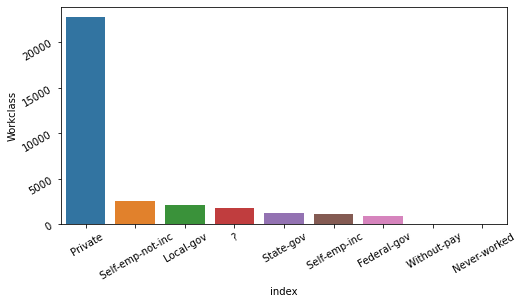

In [22]:
b=census['Workclass'].value_counts().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='index',y='Workclass',data=b)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

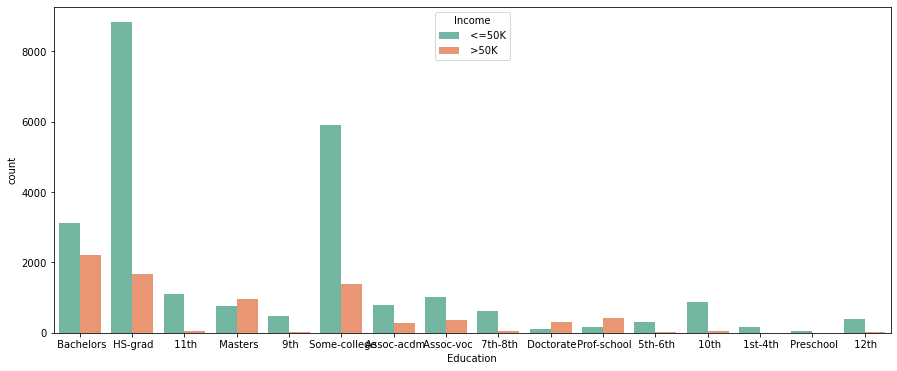

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='Education', data=census,hue='Income',palette='Set2')

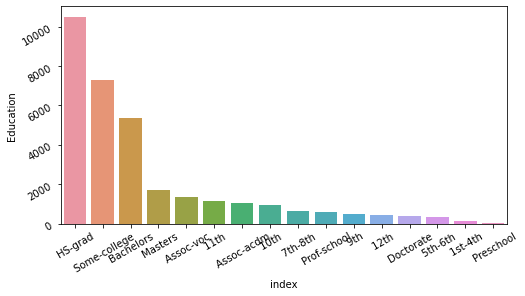

In [24]:
c=census['Education'].value_counts().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='index',y='Education',data=c)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()


plt.figure(figsize=(15,6))
sns.barplot(x='Education',y='Age',hue='Income',data=census,palette='Set2')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

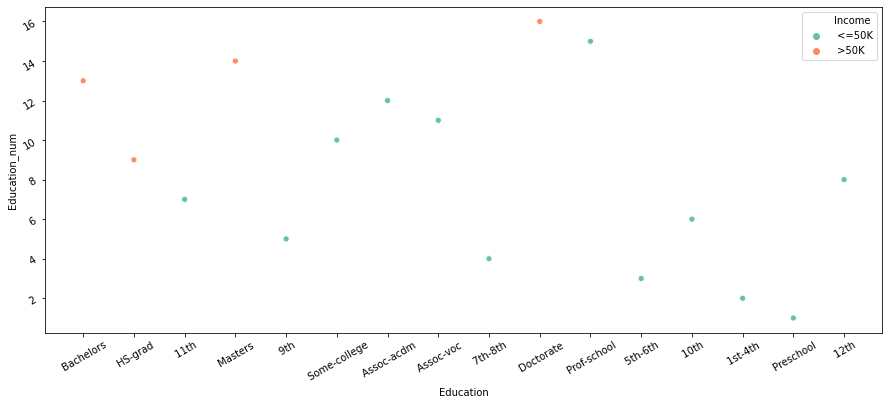

In [25]:

plt.figure(figsize=(15,6))
sns.scatterplot(x='Education',y='Education_num',hue='Income',data=census,palette='Set2')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

##### From this we can conclude that Bachelors,HS-grad, Masters and Doctorate are education qualification which earns income greater than 50k. While all other education qualification earns less than 50k. Lets sort the data.

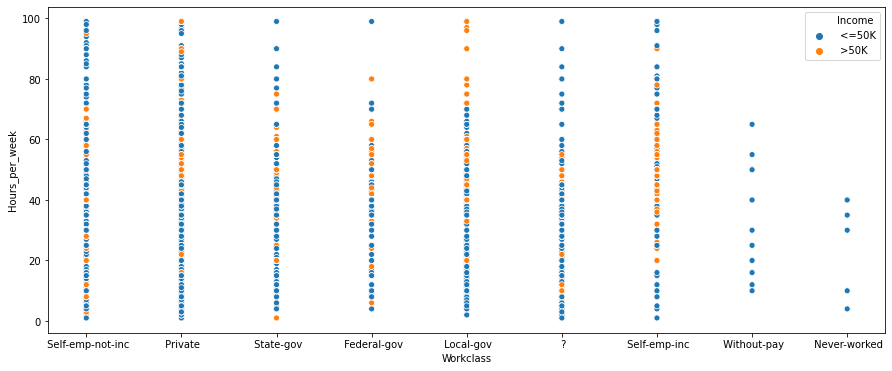

In [26]:

plt.figure(figsize=(15,6))
sns.scatterplot(x='Workclass',y='Hours_per_week',hue='Income',data=census)

In [27]:
census['Marital_status'].value_counts()

 Married-civ-spouse       14971
 Never-married            10680
 Divorced                  4443
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [28]:

Married=['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
Separated=['Separated','Divorced']
census.replace(to_replace=Married,value='Married',inplace=True)
census.replace(to_replace=Separated,value='Separated',inplace=True)
census['Marital_status'].value_counts()

 Married-civ-spouse       14971
 Never-married            10680
 Divorced                  4443
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [29]:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


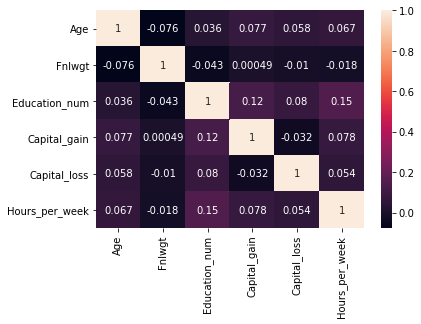

In [30]:
sns.heatmap(census.corr(),annot=True)

#### There is no presence of multicollinearity in  numerical dataset .

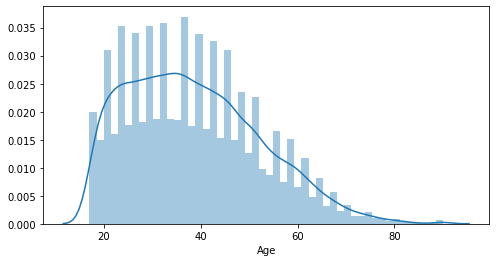

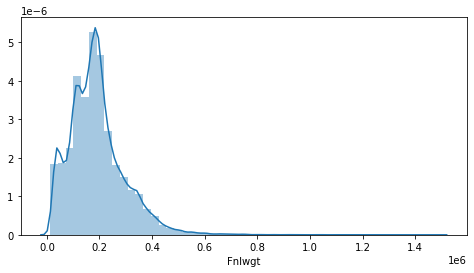

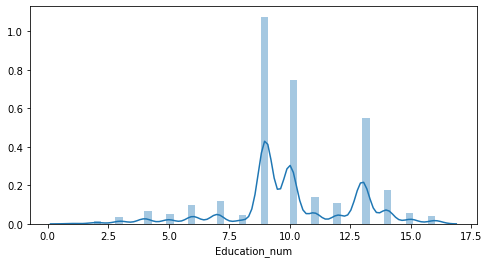

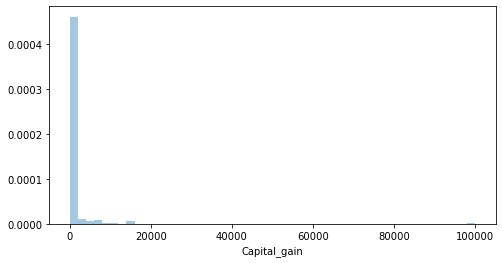

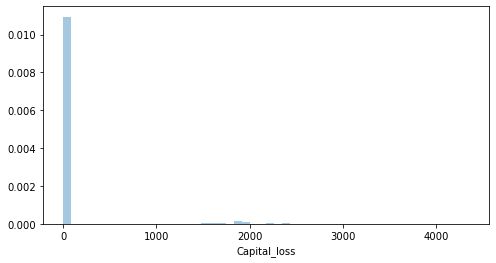

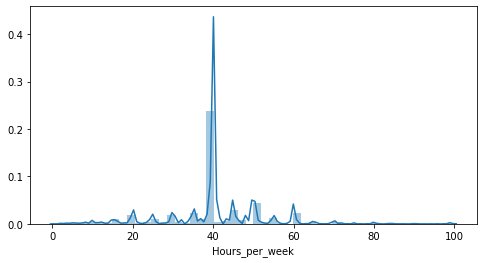

In [31]:
for i in census.columns:
    if census[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.distplot(census[i])

##### Capital_gain and Capital_loss are having skewness.

In [32]:
census.skew()

Age                0.551163
Fnlwgt             1.446987
Education_num     -0.311640
Capital_gain      11.960640
Capital_loss       4.593907
Hours_per_week     0.225137
dtype: float64

In [33]:
# Now lets remove the skewness
for index in census.skew().index:
    if census.skew().loc[index]>0.5:
        census[index]=np.log1p(census[index])
    if census.skew().loc[index]<-0.5:
        census[index]=np.square(census[index])

In [34]:
census.skew()

Age              -0.115781
Fnlwgt           -0.671452
Education_num    -0.311640
Capital_gain      3.099347
Capital_loss      4.306849
Hours_per_week    0.225137
dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in census.columns:
    if census[i].dtypes=="object":
        census[i]=le.fit_transform(census[i])
        

In [36]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' <=50K': 0, ' >50K': 1}


In [37]:
census['Marital_status'].value_counts()

2    14971
4    10680
0     4443
5     1025
6      992
3      418
1       23
Name: Marital_status, dtype: int64

In [38]:
census['Marital_status'].replace(2,1,inplace=True)
census['Marital_status'].replace(3,1,inplace=True)
census['Marital_status'].replace(5,0,inplace=True)

In [39]:
census['Marital_status'].value_counts()

1    15412
4    10680
0     5468
6      992
Name: Marital_status, dtype: int64

In [40]:
census['Marital_status'].replace(4,2,inplace=True)
census['Marital_status'].replace(6,3,inplace=True)

In [41]:
census['Marital_status'].value_counts()

1    15412
2    10680
0     5468
3      992
Name: Marital_status, dtype: int64

from scipy.stats import zscore
z=np.abs(zscore(census))
df =census[(z<3).all(axis=1)]

df.shape,census.shape

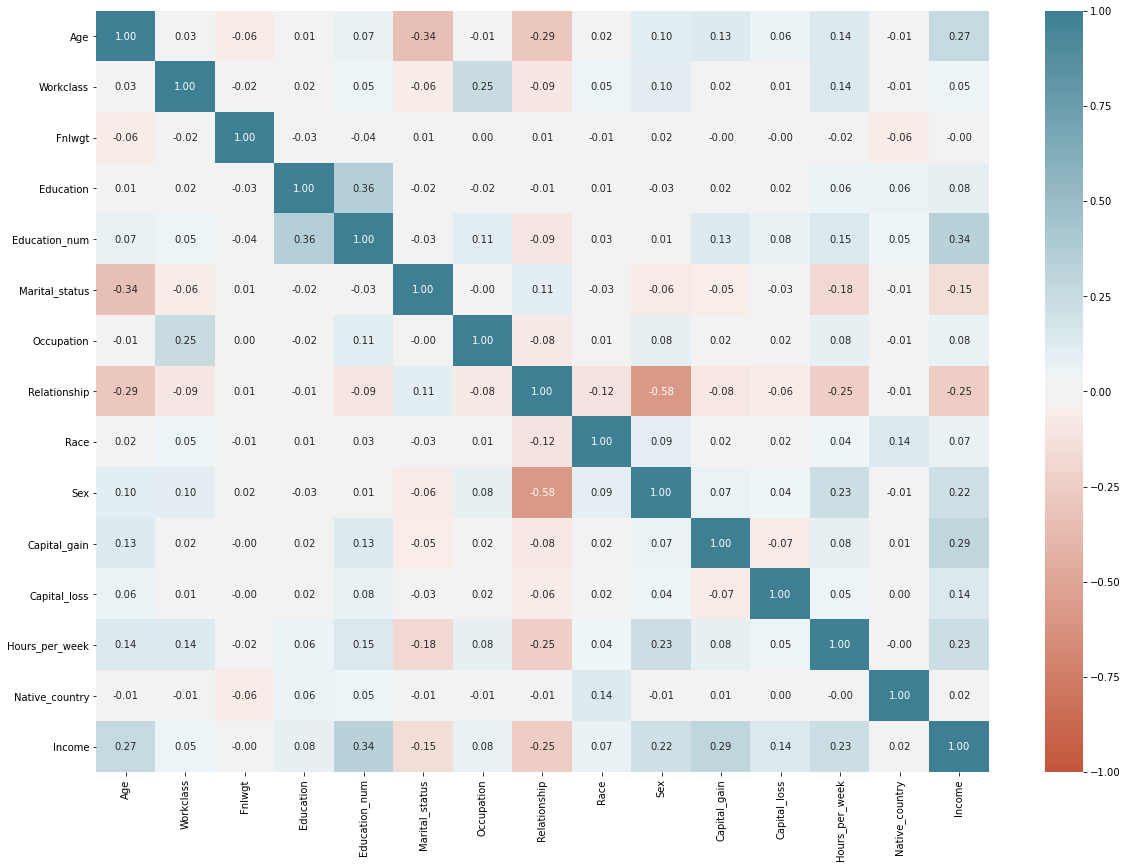

In [42]:
plt.figure(figsize=(20,14))
sns.heatmap(census.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

### Splitting independent and dependent features

In [43]:
x=census.drop(['Income'],axis=1)
y= census['Income']

In [44]:
x.shape,y.shape

((32552, 14), (32552,))

In [45]:
print("x dimension -{} \ny dimension -{}".format(x.shape,y.shape))

x dimension -(32552, 14) 
y dimension -(32552,)


In [46]:
features=x.columns

In [47]:
# Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=features)

In [48]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.896777,1.463812,-1.056917,-0.335374,1.135088,-0.293036,-0.608418,-0.900266,0.393680,0.703217,-0.299014,-0.221107,-2.222646,0.291551
1,0.129857,0.090138,0.461128,0.181338,-0.419825,-1.618619,-0.135474,-0.277911,0.393680,0.703217,-0.299014,-0.221107,-0.035053,0.291551
2,1.060182,0.090138,0.602353,-2.402220,-1.197281,-0.293036,-0.135474,-0.900266,-1.962467,0.703217,-0.299014,-0.221107,-0.035053,0.291551
3,-0.717115,0.090138,1.223088,-0.335374,1.135088,-0.293036,0.810413,2.211509,-1.962467,-1.422037,-0.299014,-0.221107,-0.035053,-4.054648
4,0.055598,0.090138,0.926914,0.439694,1.523817,-0.293036,-0.608418,2.211509,0.393680,-1.422037,-0.299014,-0.221107,-0.035053,0.291551


### Splitting training and testing data

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25)

In [50]:
X_train.shape,Y_train.shape

((24414, 14), (24414,))

In [51]:
X_test.shape,Y_test.shape

((8138, 14), (8138,))

In [52]:
# finding best random state
max_acc=0
max_rstate=0
for i in range(0,500):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=i)
    model=LogisticRegression()
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rstate=i
print("MAximum accuracy score {:.2f} at random state {}".format(max_acc,max_rstate))

MAximum accuracy score 0.83 at random state 286


In [53]:
def model(model):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=286)
    model.fit(X_train,Y_train)
    print("Training score of", model ,"is ",model.score(X_train,Y_train))
    predm=model.predict(X_test)
    print('Accuracy score',accuracy_score(Y_test,predm))
    print("Cross valildation mean is ->",cross_val_score(model,x,y,cv=6).mean())
    print("Cross valildation std is ->",cross_val_score(model,x,y,cv=6).std())
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    
    fpr,tpr,thresholds=roc_curve(Y_test,predm)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score',roc_auc)
    
    print('\n')

In [54]:
lg=LogisticRegression()
model(lg)

Training score of LogisticRegression() is  0.8164987302367495
Accuracy score 0.829073482428115
Cross valildation mean is -> 0.8191202680613284
Cross valildation std is -> 0.0014226589813664213
[[5860  398]
 [ 993  887]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      6258
           1       0.69      0.47      0.56      1880

    accuracy                           0.83      8138
   macro avg       0.77      0.70      0.73      8138
weighted avg       0.82      0.83      0.82      8138

roc_auc_score 0.7041049584191809




In [55]:
dtc=DecisionTreeClassifier()
model(dtc)

Training score of DecisionTreeClassifier() is  1.0
Accuracy score 0.8149422462521504
Cross valildation mean is -> 0.8108258524269844
Cross valildation std is -> 0.0035081549681300803
[[5470  788]
 [ 718 1162]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6258
           1       0.60      0.62      0.61      1880

    accuracy                           0.81      8138
   macro avg       0.74      0.75      0.74      8138
weighted avg       0.82      0.81      0.82      8138

roc_auc_score 0.7460831412387888




In [56]:
svm=SVC() 
model(svm)

Training score of SVC() is  0.8511509789465062
Accuracy score 0.8561071516343082
Cross valildation mean is -> 0.8453552984633923
Cross valildation std is -> 0.003271602427110404
[[5907  351]
 [ 820 1060]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6258
           1       0.75      0.56      0.64      1880

    accuracy                           0.86      8138
   macro avg       0.81      0.75      0.78      8138
weighted avg       0.85      0.86      0.85      8138

roc_auc_score 0.753870790069562




In [57]:
gnb=GaussianNB()
model(gnb)

Training score of GaussianNB() is  0.8074875071680183
Accuracy score 0.8170312115999017
Cross valildation mean is -> 0.8102730495429923
Cross valildation std is -> 0.004738718150700069
[[5485  773]
 [ 716 1164]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6258
           1       0.60      0.62      0.61      1880

    accuracy                           0.82      8138
   macro avg       0.74      0.75      0.75      8138
weighted avg       0.82      0.82      0.82      8138

roc_auc_score 0.7478135220959724




In [58]:
rfc=RandomForestClassifier()
model(rfc)

Training score of RandomForestClassifier() is  1.0
Accuracy score 0.8655689358564758
Cross valildation mean is -> 0.8567831338330607
Cross valildation std is -> 0.004237044216030555
[[5849  409]
 [ 685 1195]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6258
           1       0.75      0.64      0.69      1880

    accuracy                           0.87      8138
   macro avg       0.82      0.79      0.80      8138
weighted avg       0.86      0.87      0.86      8138

roc_auc_score 0.7851409769962533




In [59]:
knn=KNeighborsClassifier()
model(knn)

Training score of KNeighborsClassifier() is  0.8748259195543541
Accuracy score 0.8330056524944703
Cross valildation mean is -> 0.8247420368335199
Cross valildation std is -> 0.0026105405026950086
[[5614  644]
 [ 715 1165]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6258
           1       0.64      0.62      0.63      1880

    accuracy                           0.83      8138
   macro avg       0.77      0.76      0.76      8138
weighted avg       0.83      0.83      0.83      8138

roc_auc_score 0.7583862868294541




#### Boosting algorithm

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(base_estimator=rfc)

ada.fit(X_train,Y_train)
pred=ada.predict(X_test)

In [61]:
print("**** Accuracy before tunning ****")
print(accuracy_score(Y_test,pred))

**** Accuracy before tunning ****
0.8446792823789628


### Hyperparameter tunning for AdaBoostClassifier using GridSearchCV

In [62]:
params = {'n_estimators':[40,42,44,45,47],
          'learning_rate':[0.20,0.22,0.2345,0.2454,0.25]
         }
grid_ada = GridSearchCV(AdaBoostClassifier(),param_grid=params)
grid_ada.fit(X_train,Y_train)
grid_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.2454, n_estimators=47)

In [63]:
ada = AdaBoostClassifier(base_estimator=rfc,learning_rate=0.2454, n_estimators=47)
ada.fit(X_train,Y_train)
y_pred = ada.predict(X_test)

In [64]:
accuracy_score(Y_test,y_pred)

0.8500860162202015

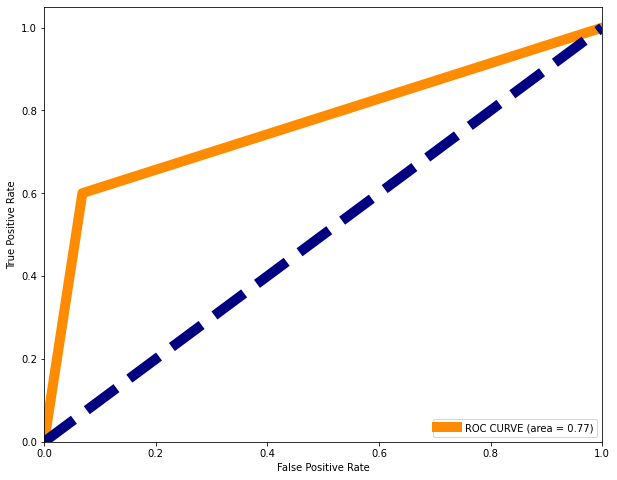

In [65]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving model

In [66]:
import joblib
filename="AdaBoost_census.obj"
joblib.dump(ada,filename)

['AdaBoost_census.obj']

In [67]:
# Loading model
model=joblib.load(filename)
model

AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                   learning_rate=0.2454, n_estimators=47)

### Conclusion

In [68]:
conclusion=pd.DataFrame([model.predict(X_test),Y_test],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8128,8129,8130,8131,8132,8133,8134,8135,8136,8137
Predicted,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Original,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
